In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 
from graph_tool.all import *
import json
tqdm.pandas()

In [5]:
def tweet_ID_to_User(ID_dico, ID):
    try:
        return ID_dico[ID]
    except:
        return np.nan

In [62]:
df_tweets = pd.read_json('./TSLA/TSLA-2020-Dec.json', lines=True)
df_tweets

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/BillyBoen/status/134443305...,2020-12-30 23:59:52+00:00,"Di penghujung 2020, $tsla 695!\n\nSkg market c...","Di penghujung 2020, $tsla 695!\n\nSkg market c...",1344433053481910277,"{'username': 'BillyBoen', 'displayname': 'BILL...",[],[],2,1,...,1,1344433053481910277,in,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
1,https://twitter.com/HausFeed/status/1344433050...,2020-12-30 23:59:52+00:00,@slye Started investing in $tsla.,@slye Started investing in $tsla.,1344433050051108865,"{'username': 'HausFeed', 'displayname': 'TheHa...",[],[],0,0,...,0,1344270630506688513,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,"[{'username': 'slye', 'displayname': 'Andy Sly..."
2,https://twitter.com/TrueBubbleHead/status/1344...,2020-12-30 23:59:33+00:00,$TSLA-aaaaaa! https://t.co/bbJ7G97omU,$TSLA-aaaaaa! https://t.co/bbJ7G97omU,1344432971441451008,"{'username': 'TrueBubbleHead', 'displayname': ...",[],[],0,0,...,0,1344432971441451008,ht,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
3,https://twitter.com/JJLuo3/status/134443267089...,2020-12-30 23:58:21+00:00,A compromise choice: $tsla https://t.co/V2SPj5...,A compromise choice: $tsla twitter.com/RevShar...,1344432670898610177,"{'username': 'JJLuo3', 'displayname': 'Jackie_...",[https://twitter.com/RevShark/status/134439695...,[https://t.co/V2SPj5Qcgk],0,0,...,0,1344432670898610177,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,{'url': 'https://twitter.com/RevShark/status/1...,None
4,https://twitter.com/MFHoz/status/1344432560454...,2020-12-30 23:57:55+00:00,Someone wrote something good on stocktwits:\n\...,Someone wrote something good on stocktwits:\n\...,1344432560454176775,"{'username': 'MFHoz', 'displayname': 'Hoz', 'i...",[],[],3,1,...,0,1344432560454176775,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124549,https://twitter.com/Pirata089/status/133356177...,2020-12-01 00:01:18+00:00,Oh God. Who the fuck in there right mind would...,Oh God. Who the fuck in there right mind would...,1333561778203189254,"{'username': 'Pirata089', 'displayname': 'Mago...",[https://twitter.com/NorthmanTrader/status/133...,[https://t.co/LUZw7E11Po],0,0,...,0,1333561778203189254,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,{'url': 'https://twitter.com/NorthmanTrader/st...,None
124550,https://twitter.com/DetectiveOption/status/133...,2020-12-01 00:01:12+00:00,Been trading smaller caps and cyclicals lately...,Been trading smaller caps and cyclicals lately...,1333561752693448705,"{'username': 'DetectiveOption', 'displayname':...",[],[],0,0,...,0,1333561752693448705,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
124551,https://twitter.com/InvestingSoph/status/13335...,2020-12-01 00:01:10+00:00,Nov portfolio update (monthly perf then weight...,Nov portfolio update (monthly perf then weight...,1333561744476803072,"{'username': 'InvestingSoph', 'displayname': '...",[],[],4,2,...,0,1333561744476803072,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,None
124552,https://twitter.com/DStevens8886/status/133356...,2020-12-01 00:00:50+00:00,$tsla no telling what stock

In [63]:
df_tweets.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers'],
      dtype='object')

In [64]:
df_IDs_Users_Tweets = df_tweets[['id','user','conversationId']]
df_IDs_Users_Tweets.loc[:,'id'] = df_IDs_Users_Tweets.loc[:,'id'].astype(str)
df_IDs_Users_Tweets.loc[:,'conversationId'] = df_IDs_Users_Tweets.loc[:,'conversationId'].astype(str)
df_IDs_Users_Tweets.loc[:,'user'] = df_IDs_Users_Tweets.loc[:,'user'].apply(lambda user_dico: user_dico['username'])
user_list = list(df_IDs_Users_Tweets['user'].values)
tweets_ID_list = list(df_IDs_Users_Tweets['id'].astype(str).values)
dico_tweets = {}
for i in range(len(user_list)):
    dico_tweets[tweets_ID_list[i]] = user_list[i]
df_IDs_Users_Tweets.loc[:,'conversationId'] = df_IDs_Users_Tweets.loc[:,'conversationId'].progress_apply(lambda conversationId: tweet_ID_to_User(dico_tweets, conversationId))
df_IDs_Users_Tweets = df_IDs_Users_Tweets.dropna(how='any', axis=0).reset_index(drop=True)
unique_user = list(np.unique(df_IDs_Users_Tweets.user))
df_IDs_Users_Tweets

/opt/conda/envs/graph/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
100%|██████████| 124554/124554 [00:00<00:00, 669512.61it/s]


,id,user,conversationId
0,1344433053481910277,BillyBoen,BillyBoen
1,1344432971441451008,TrueBubbleHead,TrueBubbleHead
2,1344432670898610177,JJLuo3,JJLuo3
3,1344432560454176775,MFHoz,MFHoz
4,1344432485623586816,Darksta22213574,Darksta22213574
...,...,...,...
107119,1333561778203189254,Pirata089,Pirata089
107120,1333561752693448705,DetectiveOption,DetectiveOption
107121,1333561744476803072,InvestingSoph,InvestingSoph
107122,1333561660490084353,DStevens8886,DStevens8886


In [119]:
matrix = np.zeros((len(unique_user),len(unique_user)))
for i in tqdm(range(df_IDs_Users_Tweets.shape[0])):
    try:
        matrix[unique_user.index(df_IDs_Users_Tweets.loc[i,'conversationId']), unique_user.index(df_IDs_Users_Tweets.loc[i,'user'])] += 1
    except:
        pass

100%|██████████| 107124/107124 [01:24<00:00, 1262.91it/s]


In [67]:
np.sum(matrix - np.diag(np.diag(matrix)))

8615.0

In [ ]:
## GRAPH CONSTRUCTION

In [65]:
df_IDs_Users_Tweets

,id,user,conversationId
0,1344433053481910277,BillyBoen,BillyBoen
1,1344432971441451008,TrueBubbleHead,TrueBubbleHead
2,1344432670898610177,JJLuo3,JJLuo3
3,1344432560454176775,MFHoz,MFHoz
4,1344432485623586816,Darksta22213574,Darksta22213574
...,...,...,...
107119,1333561778203189254,Pirata089,Pirata089
107120,1333561752693448705,DetectiveOption,DetectiveOption
107121,1333561744476803072,InvestingSoph,InvestingSoph
107122,1333561660490084353,DStevens8886,DStevens8886


In [71]:
g1 = Graph()

dico_vertex = {}
for user in unique_user:
    dico_vertex[user] = g1.add_vertex()

dico_edges = {}
df_IDs_Users_Tweets_unique = df_IDs_Users_Tweets.drop_duplicates(subset=['user','conversationId'], keep='first').reset_index(drop=True)
for i in range(df_IDs_Users_Tweets_unique.shape[0]):
    if df_IDs_Users_Tweets_unique.loc[i,'user'] != df_IDs_Users_Tweets_unique.loc[i,'conversationId']:
        dico_edges[i] = g1.add_edge(dico_vertex[df_IDs_Users_Tweets_unique.loc[i,'user']], dico_vertex[df_IDs_Users_Tweets_unique.loc[i,'conversationId']])
        
# Our graph is a directed graph. We choose the direction of the arrow in the same direction the attention is directed, i.e., if A is replying to B, then the arrow is going from A to B.
# A top influencer would have a high amount of arrow directed to him. 
# This is consistent with the PageRank system which ranks webpages according to the amount of hyperlinks directed toward it. 
# Thus, we will use the PageRank centrality measure to try to identify the top users of our network. 

In [67]:
GraphView(g1, directed=True)

<GraphView object, directed, with 19613 vertices and 6237 edges, at 0x7fb62f328eb0>

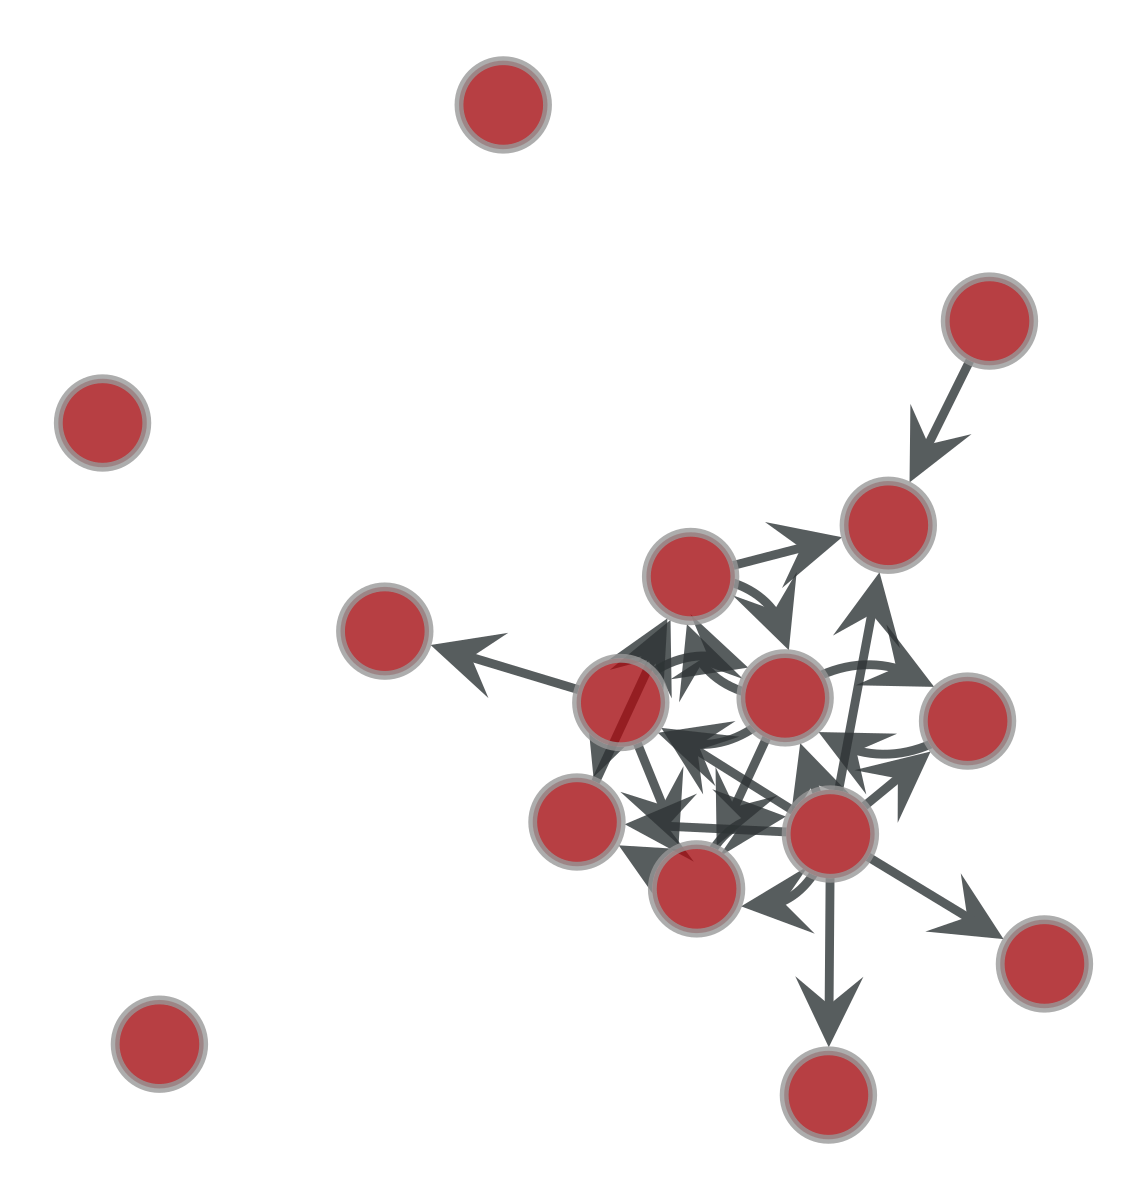

In [68]:
u = GraphView(g1, vfilt=lambda v: (v.out_degree() + v.in_degree()) > 50)
graph_draw(u);

In [70]:
pr = pagerank(g1)

df_page_rank = pd.DataFrame(list(pr.a), columns = ['page_rank score'], index = unique_user).sort_values(ascending= False, by='page_rank score')
df_page_rank.head(10)

,page_rank score
garyblack00,0.022009
squawksquare,0.016479
SawyerMerritt,0.012276
stevenmarkryan,0.011087
GerberKawasaki,0.007137
28delayslater,0.005838
vincent13031925,0.005733
ICannot_Enough,0.005487
tradingview,0.005326
ChrisDungeon,0.003874


As sanity check, we checked twitter account of these top names displayed above. Each of them is very active, has tens of thousands followers. Both the construction methodology and the centrality measure seem to be reliable to identify the most important users of our network. 

In [52]:
vp, ep = betweenness(g1)
print(central_point_dominance(g1, vp))

0.0007505823681900305


In [47]:
dico_vertex['squawksquare'].out_degree()

11

In [113]:
g1.vertex(list(pr.a).index(max(pr.a)))

<Vertex object with index '23240' at 0x7f81c96f6430>

In [137]:
ee, x = eigenvector(g1)
unique_user[list(x.a).index(max(x.a))]

'LordPente'